# RAPPORT
# TER - Adapter l'Alogorithme Ford Fulkson et Dijkstra avec Jupyter

### Tingting ZHU & Yu YANG

---



## 1.Introduction

---
### 1.1.   Contexte


  > Ce projet TER(Travaille d'Etude et de Recherche) est pour apprendre Jupyter Notebook et maîtriser ses outils. Nous modélisons l'algorithme de 
  Ford-Fulkerson et Dijkstra et faisons visualiser chaque étape d'exécution de l'algorithme. 


### 1.2.   Motivation et Objectif

  > Nous avons appris de nombreux algorithmes pour trouver le plus court chemin, comme Ford fulkson et Dijkstra. Afin de pouvoir visualiser le processus d'exécution de l'algorithme, nous utilisons `networkx` pour dessiner le graphe , puis nous utilisons `GrapheAlgrithmPlayer` d'Edwige pour visualiser l'algorithme en traçant pour chaque étape d'exécution.


### 1.3.   Introduction du Jupyter et GrapheAlgrithmPlayer

*   #### Jupyter

> Jupyter Notebook est une application Web qui facilite la création et le partage de documents de programmes(fichier se terminé par `.ipynb`), et supporte le code en temps réel, les équations mathématiques, la visualisation et markdown. Les utilisations comprennent: le nettoyage et la conversion de données, la simulation numérique, la modélisation statistique, l'apprentissage automatique, etc.

> Jupyter Notebook dispose de deux modes de saisie au clavier. 
Le mode d'édition : 
vous permet de taper du code ou du texte dans la cellule, 
la cadre de la cellule est verte.
En mode commande : 
le clavier entre la commande pour exécuter le programme,
le cadre de la cellule est gris. Par exemple : Shift + Enter: Exécutez cette unité et sélectionnez l'unité suivante;Ctrl + Entrée: exécuter cette unité.

*   #### GrapheAlgrithmPlayer

> Visualisez comment un graphe est traité par un algorithme avec networkx ou bqplot grâce à un player. Instaler avec : pip install git+https://github.com/Edwauline/DelpyWidget.git#egg=dev




---







## 2. Algorithme utilisés

---

### 2.1.   Flot Maximum(Ford et Fulkerson)

*  #### Définition
> Étant donné un graphe orienté $ G=(V,E) $, où chaque arc $ u,v $ a une capacité $ c(u,v)$, on cherche un flot maximum $ f$ depuis la source $ s$ vers le puits $ t$, sous contrainte de capacité.

*   #### Pseudo-code

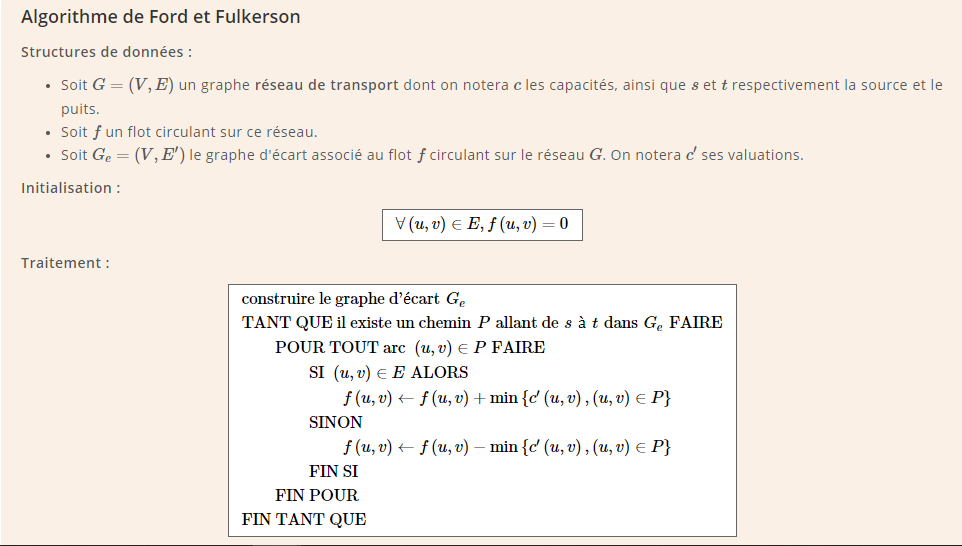






### 2.2.   Dijkstra
>   L'algorithme de Dijkstra sert à calculer des plus courts chemins à partir d'une source vers tous les autres sommets dans un graphe orienté pondéré par des réels positifs. On peut aussi l'utiliser pour calculer un plus court chemin entre un sommet de départ et un sommet d'arrivée.
* #### Pseudo-code

> ##### Initialisation de l'algorithme 
```
Initialisation(G,sdeb)
1 pour chaque point s de G faire
2    d[s] := infini             /* on initialise les sommets autres que sdeb à infini */
3 fin pour
4 d[sdeb] := 0                  /* la distance au sommet de départ sdeb est nulle */
```

> ##### Recherche d'un nœud de distance minimale


*   On recherche un nœud de distance minimale (relié par l'arc de poids le plus faible) de $ s_{{deb}}$ parmi les nœuds situés hors de $ P $. Le complémentaire de $ P$ est noté $ Q $. On implémente pour cela une fonction *Trouve_min(Q)* qui choisit un nœud de Q de distance minimale.
```
Trouve_min(Q)
1 mini := infini
2 sommet := -1
3 pour chaque sommet s de Q
4    si d[s] < mini
5    alors 
6        mini := d[s]
7        sommet := s
8 renvoyer sommet
```

> ##### Mise à jour des distances

*   On met à jour les distances entre $ s_{{deb}} $ et $ s_{{2}}$ en se posant la question : vaut-il mieux passer par $ s_{{1}}$ ou pas ?
```
maj_distances(s1,s2)
1 si d[s2] > d[s1] + Poids(s1,s2)      /* Si la distance de sdeb à s2 est plus grande que */
2                         /* celle de sdeb à S1 plus celle de S1 à S2 */
3 alors 
4   d[s2] := d[s1] + Poids(s1,s2) /* On prend ce nouveau chemin qui est plus court */
5   prédécesseur[s2] := s1        /* En notant par où on passe */
```

---



# 3. Démonstration

---

## 3.1 Flot Max(Ford-Fulkerson)


* Importer des modules nécessaires



In [8]:
import networkx as nx
from GraphAlgorithmPlayer import GraphAlgorithmPlayer
import copy

### 3.1.1 Implémentation de l'algorithme

In [11]:
class FlowNetwork(object):
    def __init__(self):
        self.adj = {}
        self.flow = {}
 
    def add_vertex(self, vertex):
        self.adj[vertex] = []
 
    def get_edges(self, v):
        return self.adj[v]
 
    def add_edge(self, u, v, w=0):
        if u == v:
            raise ValueError("u == v")
        edge = Edge(u,v,w)
        redge = Edge(v,u,0)
        edge.redge = redge
        redge.redge = edge
        self.adj[u].append(edge)
        self.adj[v].append(redge)
        self.flow[edge] = 0
        self.flow[redge] = 0
 
    def find_path(self, source, sink, path):
        if source == sink:
            return path
        for edge in self.get_edges(source):
            residual = edge.capacity - self.flow[edge]
            if residual > 0 and edge not in path:
                result = self.find_path( edge.sink, sink, path + [edge]) 
                if result != None:
                    return result
 
    def max_flow(self,G,source, sink): 
        pathG = {}
        path = self.find_path(source, sink, [])     
        while path != None:
            #print(path)
            residuals = [edge.capacity - self.flow[edge] for edge in path]
            flow = min(residuals)
            edge_liste_path = []
            edge_path=(0,0)
            for edge in path:
                color_path = []
                self.flow[edge] += flow
                self.flow[edge.redge] -= flow
                try:
                    G[edge.source][edge.sink]['flow']
                except KeyError:
                    dict_exists = False
                else:
                    dict_exists = True
                if(dict_exists):
                    G[edge.source][edge.sink]['flow']+=flow
                    edge_path = (edge.source,edge.sink)
                else:
                    G[edge.sink][edge.source]['flow']-=flow
                    edge_path = (edge.sink,edge.source)
                if(edge_path in edge_liste_path):
                    edge_liste_path.remove(edge_path)
                else : 
                    edge_liste_path.append(edge_path)

            path = self.find_path(source, sink, [])
            #npos=dict(zip(nodes,vnode))
            
            node_labels = dict()
            for node in G.nodes:
                node_labels[node] = str(node)
            edge_labels=dict()
            for edge in G.edges :
                edge_labels[edge]=str(G.edges[edge]['flow']) + ' / ' + str(G.edges[edge]['weight'])
            flot_ajoute = sum(self.flow[edge] for edge in self.get_edges(source))
            player.set_value(copy.deepcopy(locals()))
        return flot_ajoute


### 3.1.2 Créer un graphe
* l'attribut d'edge différent


> edge rouge : chemin choisi de cette étape


> edge noir : edge non choisi






In [14]:
variables=[
          {'name': 'G',          'type':'graph'                                     },
          {'name':'edge_liste_path',      'type':'edges', 'color': 'red', 'display':True   },
          {'name':'edge_labels',    'type':'edges', 'label': True,    'display': False },
          {'name':'node_labels',        'type':'nodes', 'label': True,    'display': False },
          {'name':'flow',        'type':'nodes',   'display': True },
          {'name':'flot_ajoute',        'type':'nodes',   'display': True }
          ]

* chaque edge a son capacité propre

In [15]:
class Edge(object):
    def __init__(self, u, v, w):
        self.source = u
        self.sink = v  
        self.capacity = w
    def __repr__(self):
        return "%s->%s:%s" % (self.source, self.sink, self.capacity)

* Créer le graphe vide

In [16]:
g=FlowNetwork()

### 3.1.3 Lire le fichier `.txt` de graphe

In [ ]:
file = open('dataFlot1.txt') # dataFlot1.txt est le nom du fichier
line = file.readline()
line = line.strip().split(' ')
print(line)
G = nx.DiGraph()
[G.add_node(v) for v in line]
[g.add_vertex(v) for v in line]
line = file.readline()
while line:
    line = line.strip().split(' ')
    G.add_edge(line[0],line[1],weight=int(line[2]),flow=0)
    g.add_edge(line[0],line[1],int(line[2]))
    line = file.readline()
file.close()

npos = nx.spring_layout(G)

node_labels = dict()
for node in G.nodes:
     node_labels[node] = str(node)
edge_labels= dict()
for edge in G.edges :
     edge_labels[edge]=str(G.edges[edge]['flow']) + ' / ' + str(G.edges[edge]['weight'])


### 3.1.4 Visualisation


* dessiner le graphe


In [ ]:
player = GraphAlgorithmPlayer(G, variables=variables, view='networkx')
player


* trouver le plus court chemin étape par étape

In [ ]:
g.max_flow(G, 's','t')

## 3.2 Dijkstra

* Importer des modules nécessaires


In [ ]:
from collections import defaultdict
from heapq import *
import networkx as nx
import matplotlib.pyplot as plt
from GraphAlgorithmPlayer import GraphAlgorithmPlayer
import copy

### 3.2.1 Implémentation de l'algorithme

In [ ]:
def dijkstra_raw(G,edges, dep, dst):
    g = defaultdict(list)
    for u,v,p in edges:#u->v p:poids
        g[u].append((p,v))
    q, seen = [(0,dep,())], set()
    developpe = []

    while q:
        non_developpe = []
        (poid,v1,trajet) = heappop(q)
        if v1 not in seen:
            print('trajet',trajet)
            seen.add(v1)
            
            list_v1=[]  #list de trajet : red
            if len(trajet)>0:
                u = trajet[0]
                list_v1.append(u)    
                v = trajet[1]
                while len(v)>0:
                    u = v[0]
                    list_v1.append(u)    
                    v = v[1]
            
            trajet = (v1, trajet)
            developpe.append(v1)
            if v1 == dst:
                player.set_value(copy.deepcopy(locals()))
                return poid,trajet
            
            list_v2 = []
            for p, v2 in g.get(v1, ()):
                if v2 not in seen:
                    list_v2.append(v2)
                    heappush(q, (poid+p, v2, trajet))
            for i in q :
                non_developpe.append(i[1])
                    
            player.set_value(copy.deepcopy(locals()))
            
            
    return float("inf"),[]
 
def dijkstra(G,edges, dep, dst):
    pcc = -1    #pcc:plus court chemin
    ret_trajet=[]
    longueur,trajet_queue = dijkstra_raw(G,edges, dep, dst)
    if len(trajet_queue)>0:
        pcc = longueur    ## 1. Get the length firstly;
        ## 2. Decompose the path_queue, to get the passing nodes in the shortest path.
        u = trajet_queue[0]
        ret_trajet.append(u)    ## 2.1 Record the destination node firstly;
        v = trajet_queue[1]
        while len(v)>0:
            u = v[0]
            ret_trajet.append(u)    ## 2.2 Record other nodes, till the source-node.
            v = v[1]
        ret_trajet.reverse() ## 3. Reverse the list finally, to make it be normal sequence.
    return pcc,ret_trajet


###3.2.2 Créer un graphe
* l'attribut d'arc différent

> node rouge : node déjà développé

> node vert : node déjà vu mais pas encore développé

> node jaune : node en traint de développer

> node départ(gris) : node n'a pas encore vu



In [ ]:
variables=[
          {'name': 'G',          'type':'graph'                                     },
          {'name':'node_labels',        'type':'nodes', 'label': True,    'display': False },
          {'name':'non_developpe',        'type':'nodes', 'color': 'green',   'display': True },
          {'name':'developpe',        'type':'nodes', 'color': 'red',   'display': True },
          {'name':'v1',        'type':'nodes', 'color': 'yellow',   'display': True }
          ]

### 3.2.3 Lire des données de graphe et le créer

In [ ]:
data =[('a','b',2),('a','c',3),('b','c',4),('b','d',3),('c','e',5),('d','f',2),('c','d',6),('f','g',4),('c','g',5)]

G = nx.DiGraph()#.random_regular_graph
G.add_weighted_edges_from(data)



### 3.2.4 Visualisation des étapes

* dessiner le graphe

In [ ]:
player = GraphAlgorithmPlayer(G, variables=variables, view='networkx')
player

* Trouver le plus court chemin étape par étape

In [ ]:
length,Shortest_path = dijkstra(G,data, 'a', 'g')

# 4. Conclusion et retour d'experience
>  En fait, c'est la première fois que nous utilisons Jupyter. A traver la demonstration des deux algorithme pour ce projet, j'ai famille  avec des bibliothèque de Jupyter et c'est un outil pratique pour un programme interactive. Premièrement, on peut coder cellule par cellule et donc on peut le tester quand on ajoute ou modifie une cellule. C'est plus simple qu'exécuter le programme sur terminal. En plus, il a beaucoup de outil pour dessiner cela aide de réaliser la visualisation . Troisièmement ,l'extension Rise de Jupyter permet de faire des Diaporama avec des codes dedans.
Après notre expérience, Jupyter est bien adapté aux objectifs de ce TER(algorithmique interactive).

* Conseil pour l'etudiant veut programmer en Python avec Jupyter

> On peut utiliser `networkx` pour dessiner des graphe; pour utiliser `GrapheAlgrithmPlayer`, il faut étudier les document de `ipytwidgets` d'abord et lancer les exemple de GrapheAlgrithmPlayer d'Edwige([GrapheAlgrithmPlayer](https://gitlab.u-psud.fr/edwige.gros/GraphAlgorithmPlayer/tree/master/GraphAlgorithmPlayer)). 



